# Phase Potrait of the RBM trained on 1D ising model with beta and r=N/S

In [1]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies

In [249]:
import dill
dill.dump_session('./data_bruckner/data/notebookData/15_phasePortrait_beta_r.db')

In [2]:
import dill
dill.load_session('./data_bruckner/data/notebookData/15_phasePortrait_beta_r.db')

In [4]:
#Defining Parameters

Num_configs = np.sort(np.append(np.ceil(10**(np.linspace(3,4.5,5))),np.unique(np.round(100./(np.linspace(0.001,10,40))))))

beta = np.append([10**-6,10**-5,10**-4,10**-3],np.linspace(0.01,1.5,30))

N = np.zeros(len(beta)) + 100
Nstep = np.zeros(len(beta)) + 200

#Change the array type to int array from float array
N = N.astype(int)
Nstep = Nstep.astype(int)
Num_configs = Num_configs.astype(int)

In [11]:
#Defining Parameters

Num_configs = np.sort(np.append(np.ceil(10**(np.linspace(3,4,5))),np.unique(np.round(100./(np.linspace(0.01,1,5))))))
#Num_configs = np.array([100,1000,5000,10000])
#beta = np.append([10**-5,10**-4,10**-3,10**-2],np.linspace(0.02,2.0,5))
beta = np.linspace(0.01,5.0,9)

N = np.zeros(len(beta)) + 100
Nstep = np.zeros(len(beta)) + 200

#Change the array type to int array from float array
N = N.astype(int)
Nstep = Nstep.astype(int)
Num_configs = Num_configs.astype(int)

In [12]:
print beta
print len(beta)
print Num_configs
print len(Num_configs)

[ 0.01     0.63375  1.2575   1.88125  2.505    3.12875  3.7525   4.37625
  5.     ]
9
[  100   133   198   388  1000  1779  3163  5624 10000 10000]
10


In [155]:
#class trainRBMising():
    #self 

In [156]:
# Top Eignvectors of the C_ij matrix:
def topEV(data,method='Covariance'):
    if method is 'Covariance':
        #Find the covariance matrix:
        covMAT = np.cov(data)
    elif method is 'Correlation':
        covMAT = np.corrcoef(data)
        np.nan_to_num(covMAT,copy=False)
    Eval,Evec = np.linalg.eig(covMAT)
    return Evec[:,np.argmax(Eval)],np.max(Eval)

## Plot the expected curve and find points at perpendicular distances from the curve. Find the phase of these points.

The curve is $$ \frac{1+tanh(\beta)}{1-tanh(\beta)} = \left( 1+ \sqrt\frac{N}{S} \right)^2 $$

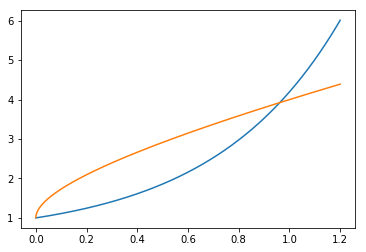

In [157]:
x_rg = np.linspace(0.00001,1.2,100000)
y_beta = 1+np.tanh(x_rg)/(1-np.tanh(x_rg))
y_r = (1+(x_rg)**0.5)**2

plt.plot(x_rg,y_beta)
plt.plot(x_rg,y_r)

ValueError: x and y must have same first dimension, but have shapes (100,) and (100000,)

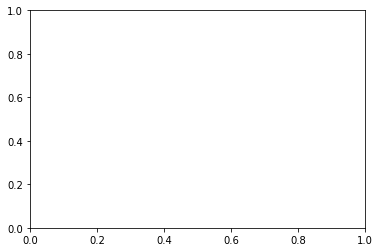

In [158]:
x_beta = np.linspace(0.00001,1,100)
y_n_over_s = 100/(((1+np.tanh(x_rg)/(1-np.tanh(x_rg)))**0.5 - 1)**2)

plt.plot(x_beta,y_n_over_s)

## Generate the Correlation Matrix and check the top eigenvector to get the phase:

In [169]:
XBM       = []
Xdata     = []
#Xresults  = []
#XRBM      = []
Xdata_big = []
Xresults_big = []

mat_topEV = np.zeros([len(beta),len(Num_configs),int(N[0])])
mat_topEVal = np.zeros([len(beta),len(Num_configs)])

for i in np.arange(len(beta)):

    #Generate spins using Gibbs Sampling MCMC
    XBM.append(bm.BM(N=N[i],nature='Spin'))

    #Define Couplings
    XBM[i].layer.couplings =  beta[i]*(np.eye(N=N[i],k=1) + np.eye(N=N[i],k=-1))
    XBM[i].layer.couplings[0,-1] += beta[i]
    XBM[i].layer.couplings[-1,0] += beta[i]

    for j in np.arange(len(Num_configs)):

        #Generating the ising model data
        Xdata.append(XBM[i].gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs[j],Nstep=Nstep[i])) # N steps.

        #Calculate Top eignevectors and eigenvalues and store it in a matrix
        mat_topEV[i,j,:],mat_topEVal[i,j] = topEV(Xdata[j].T,method='Correlation')
        
        print i,j
    Xdata_big.append(Xdata)
    #Xresults_big.append(Xresults)

    Xdata = []
    #Xresults = []

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9


/users/harsh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: ComplexWarning: Casting complex values to real discards the imaginary part


3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7
8 8
8 9


Text(0.5,1,u'Phase Plot with Top Eigenvalue Value with N = 100')

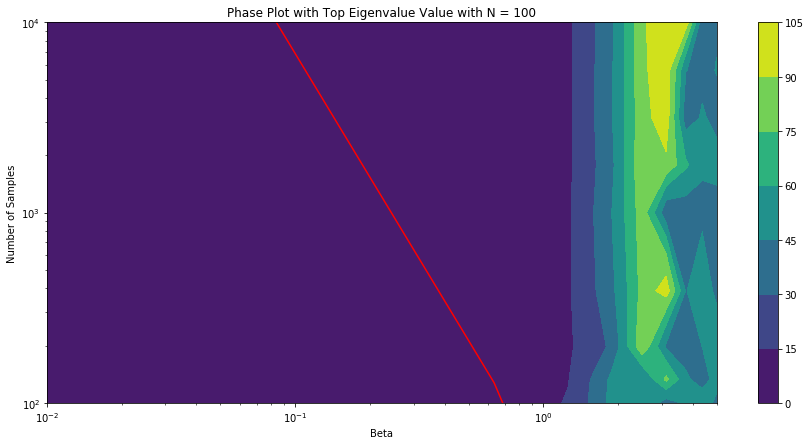

In [192]:
plt.figure(figsize=[15,7])
plt.contourf(beta,Num_configs,mat_topEVal.T)
plt.plot(beta,float(N[0])/((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(Num_configs),max(Num_configs)])
plt.xlim([min(beta),max(beta)])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('Number of Samples')
plt.title('Phase Plot with Top Eigenvalue Value with N = 100')

Text(0.04,0.1,u'$\\frac{1+tanh(\\beta)}{1-tanh(\\beta)} = (1+\\sqrt{r})^2$')

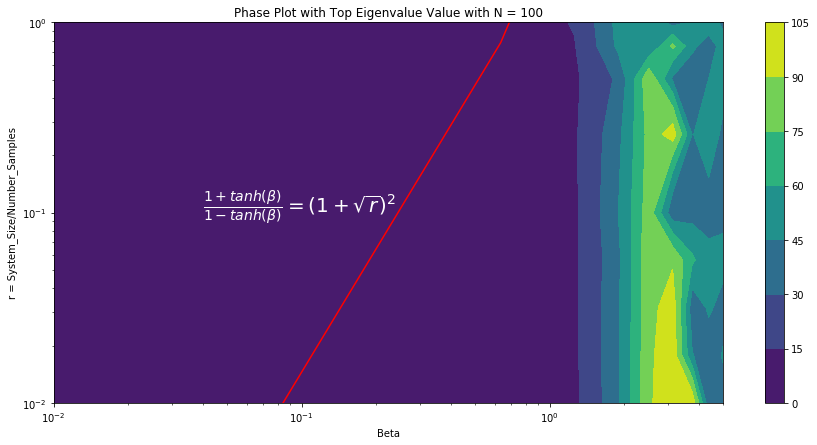

In [211]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
plt.contourf(beta,float(N[0])/Num_configs,mat_topEVal.T)
plt.plot(beta,((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(float(N[0])/Num_configs),max(float(N[0])/Num_configs)])
plt.xlim([min(beta),max(beta)])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('r = System_Size/Number_Samples')
plt.title('Phase Plot with Top Eigenvalue Value with N = 100')
ax.text(0.04,0.1, r'$\frac{1+tanh(\beta)}{1-tanh(\beta)} = (1+\sqrt{r})^2$', fontsize=20,color = 'white')

In [176]:
print mat_topEVal

[[  3.66588971   3.47488421   2.90507275   2.25680674   1.6839935
    1.52328039   1.38392741   1.27342678   1.20551979   1.20306716]
 [  6.17177142   5.2904692    5.16958978   4.75582503   4.27140177
    3.88731327   3.72888327   3.64983181   3.67888766   3.64918574]
 [ 16.12061861  14.2526609   12.87365558  13.29828019  12.75776576
   12.65178405  12.31108709  12.47819095  12.10991445  12.69582118]
 [ 49.73906564  48.11503246  32.78367988  41.0791649   44.52794151
   41.34802733  43.66429748  43.02432995  42.25389929  41.94921771]
 [ 56.6598893   44.87747495  87.01002644  80.31725202  83.46347288
   87.89335702  85.05394016  87.49001225  88.39323401  87.8201694 ]
 [ 38.70607753  78.25680028  42.63004028  98.02106883  33.4989836
   87.47593854  98.40894346  98.95118472  98.62924107  98.59906075]
 [ 47.24790544  48.49693613  34.78138309  44.29024938  37.76159256
   62.55391192  35.83619612  45.58848555  99.74972834  99.67426408]
 [ 56.53929612  36.4897992   45.15025113  53.54079456  40

### Plot the sum of the top Eigenvector:

Text(0.5,1,u'Phase Plot with Top Eigenvalue Value with N = 100')

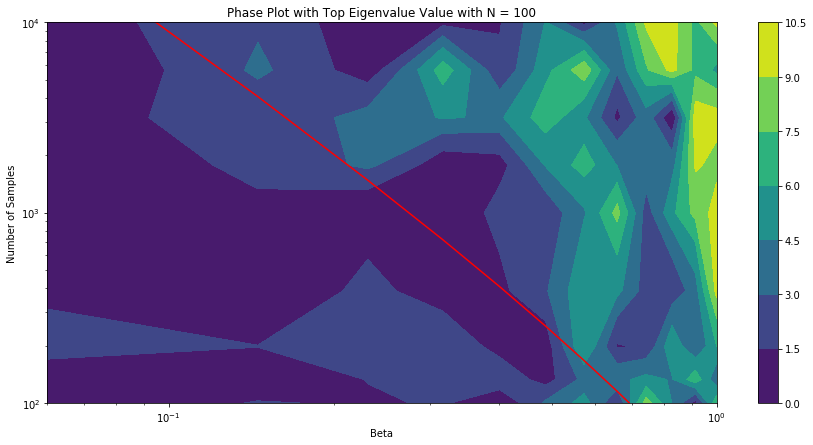

In [5]:
plt.figure(figsize=[15,7])
plt.contourf(beta,Num_configs,abs(np.sum(mat_topEV,axis=2).T))
plt.plot(beta,float(N[0])/((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(Num_configs),max(Num_configs)])
plt.xlim([min(beta),max(beta)])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('Number of Samples')
plt.title('Phase Plot with Top Eigenvalue Value with N = 100')

Text(0.1,0.1,u'$\\frac{1+tanh(\\beta)}{1-tanh(\\beta)} = (1+\\sqrt{r})^2$')

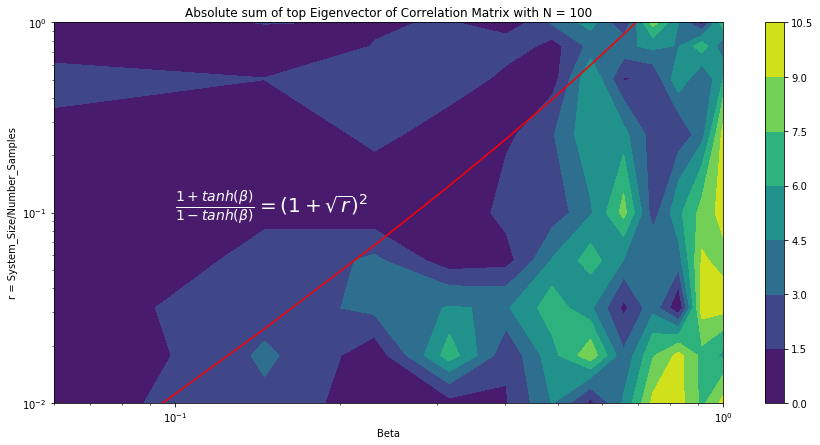

In [9]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
plt.contourf(beta,float(N[0])/Num_configs,abs(np.sum(mat_topEV,axis=2).T))
plt.plot(beta,((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(float(N[0])/Num_configs),max(float(N[0])/Num_configs)])
plt.xlim([min(beta),max(beta)])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('r = System_Size/Number_Samples')
plt.title('Absolute sum of top Eigenvector of Correlation Matrix with N = 100')
ax.text(0.1,0.1, r'$\frac{1+tanh(\beta)}{1-tanh(\beta)} = (1+\sqrt{r})^2$', fontsize=20,color = 'white')

## Make the contour plot of the top Eigenvalue with the theoretical curve:

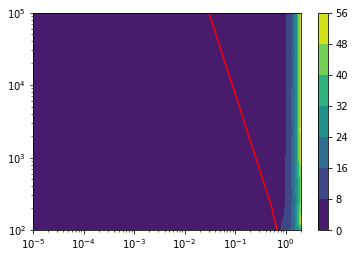

In [39]:
plt.contourf(beta[0:],Num_configs[0:],mat_topEVal[:,0:].T)
plt.plot(beta,float(N[0])/((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(Num_configs[0:]),max(Num_configs[0:])])
plt.xlim([min(beta[:]),max(beta[:])])
plt.colorbar()

## Train an RBM?

In [ ]:
XBM       = []
Xdata     = []
Xresults  = []
XRBM      = []
Xdata_big = []
Xresults_big = []
XRBM_big = []

mat_topEV = np.zeros([len(beta),len(Num_configs),int(N[0])])
mat_topEVal = np.zeros([len(beta),len(Num_configs)])

for i in np.arange(len(beta)):
    
    #Generate spins using Gibbs Sampling MCMC
    XBM.append(bm.BM(N=N[i],nature='Spin'))

    #Define Couplings
    XBM[i].layer.couplings =  beta[i]*(np.eye(N=N[i],k=1) + np.eye(N=N[i],k=-1) )
    XBM[i].layer.couplings[0,-1] += beta[i]
    XBM[i].layer.couplings[-1,0] += beta[i]
    
    for j in np.arange(len(Num_configs)):

        #Generating the ising model data
        Xdata.append(XBM[i].gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs[j],Nstep=Nstep[i])) # N steps.

        #Calculate Top eignevectors and eigenvalues and store it in a matrix
        mat_topEV[i,j,:],mat_topEVal[i,j] = topEV(Xdata[j].T,method='Correlation')
        
        #Train the RBM on this data
        XRBM.append(rbm.RBM(visible = 'Spin', n_v=N[i], n_h = 1, hidden = 'Spin',zero_field = True))
        Xresults.append(XRBM[j].fit(Xdata[j],n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],\
                                    record_interval=250,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False))
        
    Xdata_big.append(Xdata)
    Xresults_big.append(Xresults)
    XRBM_big.append(XRBM)
    
    Xdata = []
    Xresults = []
    XRBM = []

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

Starting epoch 203
Starting epoch 204
Starting epoch 205
Starting epoch 206
Starting epoch 207
Starting epoch 208
Starting epoch 209
Starting epoch 210
Starting epoch 211
Starting epoch 212
Starting epoch 213
Starting epoch 214
Starting epoch 215
Starting epoch 216
Starting epoch 217
Starting epoch 218
Starting epoch 219
Starting epoch 220
Starting epoch 221
Starting epoch 222
Starting epoch 223
Starting epoch 224
Starting epoch 225
Starting epoch 226
Starting epoch 227
Starting epoch 228
Starting epoch 229
Starting epoch 230
Starting epoch 231
Starting epoch 232
Starting epoch 233
Starting epoch 234
Starting epoch 235
Starting epoch 236
Starting epoch 237
Starting epoch 238
Starting epoch 239
Starting epoch 240
Starting epoch 241
Starting epoch 242
Starting epoch 243
Starting epoch 244
Starting epoch 245
Starting epoch 246
Starting epoch 247
Starting epoch 248
Starting epoch 249
Starting epoch 250
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Sta

Starting epoch 149
Starting epoch 150
Starting epoch 151
Starting epoch 152
Starting epoch 153
Starting epoch 154
Starting epoch 155
Starting epoch 156
Starting epoch 157
Starting epoch 158
Starting epoch 159
Starting epoch 160
Starting epoch 161
Starting epoch 162
Starting epoch 163
Starting epoch 164
Starting epoch 165
Starting epoch 166
Starting epoch 167
Starting epoch 168
Starting epoch 169
Starting epoch 170
Starting epoch 171
Starting epoch 172
Starting epoch 173
Starting epoch 174
Starting epoch 175
Starting epoch 176
Starting epoch 177
Starting epoch 178
Starting epoch 179
Starting epoch 180
Starting epoch 181
Starting epoch 182
Starting epoch 183
Starting epoch 184
Starting epoch 185
Starting epoch 186
Starting epoch 187
Starting epoch 188
Starting epoch 189
Starting epoch 190
Starting epoch 191
Starting epoch 192
Starting epoch 193
Starting epoch 194
Starting epoch 195
Starting epoch 196
Starting epoch 197
Starting epoch 198
Starting epoch 199
Starting epoch 200
Starting epo

Starting epoch 92
Starting epoch 93
Starting epoch 94
Starting epoch 95
Starting epoch 96
Starting epoch 97
Starting epoch 98
Starting epoch 99
Starting epoch 100
Starting epoch 101
Starting epoch 102
Starting epoch 103
Starting epoch 104
Starting epoch 105
Starting epoch 106
Starting epoch 107
Starting epoch 108
Starting epoch 109
Starting epoch 110
Starting epoch 111
Starting epoch 112
Starting epoch 113
Starting epoch 114
Starting epoch 115
Starting epoch 116
Starting epoch 117
Starting epoch 118
Starting epoch 119
Starting epoch 120
Starting epoch 121
Starting epoch 122
Starting epoch 123
Starting epoch 124
Starting epoch 125
Starting epoch 126
Starting epoch 127
Starting epoch 128
Starting epoch 129
Starting epoch 130
Starting epoch 131
Starting epoch 132
Starting epoch 133
Starting epoch 134
Starting epoch 135
Starting epoch 136
Starting epoch 137
Starting epoch 138
Starting epoch 139
Starting epoch 140
Starting epoch 141
Starting epoch 142
Starting epoch 143
Starting epoch 144
S

In [214]:
sum_weightsRBM = np.zeros([len(beta),len(Num_configs)])
for i in np.arange(len(beta)):
    for j in np.arange(len(Num_configs)):
        sum_weightsRBM[i,j] = np.sum(np.array(Xresults_big[i][j]['W'])[-1,0,:])

Text(0.04,0.1,u'$\\frac{1+tanh(\\beta)}{1-tanh(\\beta)} = (1+\\sqrt{r})^2$')

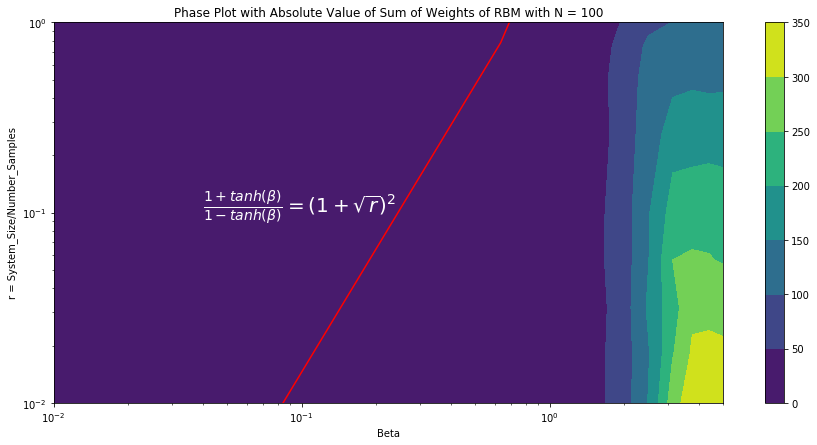

In [14]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
plt.contourf(beta,float(N[0])/Num_configs,abs(sum_weightsRBM.T))
plt.plot(beta,((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(float(N[0])/Num_configs),max(float(N[0])/Num_configs)])
plt.xlim([min(beta),max(beta)])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('r = System_Size/Number_Samples')
plt.title('Phase Plot with Absolute Value of Sum of Weights of RBM with N = 100')
ax.text(0.04,0.1, r'$\frac{1+tanh(\beta)}{1-tanh(\beta)} = (1+\sqrt{r})^2$', fontsize=20,color = 'white')

### Zoomed in:

Text(0.04,0.1,u'$\\frac{1+tanh(\\beta)}{1-tanh(\\beta)} = (1+\\sqrt{r})^2$')

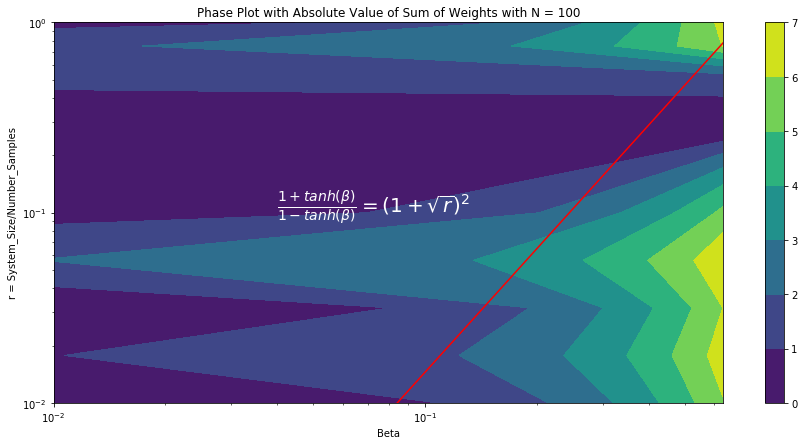

In [226]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
plt.contourf(beta[0:2],float(N[0])/Num_configs,abs(sum_weightsRBM[0:2,:].T))
plt.plot(beta[0:2],((((1+np.tanh(beta[0:2]))/(1-np.tanh(beta[0:2])))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(float(N[0])/Num_configs),max(float(N[0])/Num_configs)])
plt.xlim([min(beta[0:2]),max(beta[0:2])])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('r = System_Size/Number_Samples')
plt.title('Phase Plot with Absolute Value of Sum of Weights with N = 100')
ax.text(0.04,0.1, r'$\frac{1+tanh(\beta)}{1-tanh(\beta)} = (1+\sqrt{r})^2$', fontsize=20,color = 'white')

## Plot points near the line only since the values on the right bias the scale:

In [227]:
#Defining Parameters

Num_configs = np.sort(np.append(np.ceil(10**(np.linspace(3,4,5))),np.unique(np.round(100./(np.linspace(0.01,1,5))))))
#Num_configs = np.array([100,1000,5000,10000])
#beta = np.append([10**-5,10**-4,10**-3,10**-2],np.linspace(0.02,2.0,5))
beta = np.linspace(0.06,1,12)

N = np.zeros(len(beta)) + 100
Nstep = np.zeros(len(beta)) + 200

#Change the array type to int array from float array
N = N.astype(int)
Nstep = Nstep.astype(int)
Num_configs = Num_configs.astype(int)

In [228]:
print beta
print len(beta)
print Num_configs
print len(Num_configs)

[ 0.06        0.14545455  0.23090909  0.31636364  0.40181818  0.48727273
  0.57272727  0.65818182  0.74363636  0.82909091  0.91454545  1.        ]
12
[  100   133   198   388  1000  1779  3163  5624 10000 10000]
10


In [ ]:
XBM       = []
Xdata     = []
Xresults  = []
XRBM      = []
Xdata_big = []
Xresults_big = []
XRBM_big = []

mat_topEV = np.zeros([len(beta),len(Num_configs),int(N[0])])
mat_topEVal = np.zeros([len(beta),len(Num_configs)])

for i in np.arange(len(beta)):
    
    #Generate spins using Gibbs Sampling MCMC
    XBM.append(bm.BM(N=N[i],nature='Spin'))

    #Define Couplings
    XBM[i].layer.couplings =  beta[i]*(np.eye(N=N[i],k=1) + np.eye(N=N[i],k=-1) )
    XBM[i].layer.couplings[0,-1] += beta[i]
    XBM[i].layer.couplings[-1,0] += beta[i]
    
    for j in np.arange(len(Num_configs)):

        #Generating the ising model data
        Xdata.append(XBM[i].gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs[j],Nstep=Nstep[i])) # N steps.

        #Calculate Top eignevectors and eigenvalues and store it in a matrix
        mat_topEV[i,j,:],mat_topEVal[i,j] = topEV(Xdata[j].T,method='Correlation')
        
        #Train the RBM on this data
        XRBM.append(rbm.RBM(visible = 'Spin', n_v=N[i], n_h = 1, hidden = 'Spin',zero_field = True))
        Xresults.append(XRBM[j].fit(Xdata[j],n_iter=250,verbose=0,learning_rate = 0.001,record=['W'],\
                                    record_interval=250,batch_size=10,N_MC= 20, lr_decay=False,batch_norm=False))
        
    Xdata_big.append(Xdata)
    Xresults_big.append(Xresults)
    XRBM_big.append(XRBM)
    
    Xdata = []
    Xresults = []
    XRBM = []

Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
S

Starting epoch 201
Starting epoch 202
Starting epoch 203
Starting epoch 204
Starting epoch 205
Starting epoch 206
Starting epoch 207
Starting epoch 208
Starting epoch 209
Starting epoch 210
Starting epoch 211
Starting epoch 212
Starting epoch 213
Starting epoch 214
Starting epoch 215
Starting epoch 216
Starting epoch 217
Starting epoch 218
Starting epoch 219
Starting epoch 220
Starting epoch 221
Starting epoch 222
Starting epoch 223
Starting epoch 224
Starting epoch 225
Starting epoch 226
Starting epoch 227
Starting epoch 228
Starting epoch 229
Starting epoch 230
Starting epoch 231
Starting epoch 232
Starting epoch 233
Starting epoch 234
Starting epoch 235
Starting epoch 236
Starting epoch 237
Starting epoch 238
Starting epoch 239
Starting epoch 240
Starting epoch 241
Starting epoch 242
Starting epoch 243
Starting epoch 244
Starting epoch 245
Starting epoch 246
Starting epoch 247
Starting epoch 248
Starting epoch 249
Starting epoch 250
Starting epoch 1
Starting epoch 2
Starting epoch 3

Starting epoch 145
Starting epoch 146
Starting epoch 147
Starting epoch 148
Starting epoch 149
Starting epoch 150
Starting epoch 151
Starting epoch 152
Starting epoch 153
Starting epoch 154
Starting epoch 155
Starting epoch 156
Starting epoch 157
Starting epoch 158
Starting epoch 159
Starting epoch 160
Starting epoch 161
Starting epoch 162
Starting epoch 163
Starting epoch 164
Starting epoch 165
Starting epoch 166
Starting epoch 167
Starting epoch 168
Starting epoch 169
Starting epoch 170
Starting epoch 171
Starting epoch 172
Starting epoch 173
Starting epoch 174
Starting epoch 175
Starting epoch 176
Starting epoch 177
Starting epoch 178
Starting epoch 179
Starting epoch 180
Starting epoch 181
Starting epoch 182
Starting epoch 183
Starting epoch 184
Starting epoch 185
Starting epoch 186
Starting epoch 187
Starting epoch 188
Starting epoch 189
Starting epoch 190
Starting epoch 191
Starting epoch 192
Starting epoch 193
Starting epoch 194
Starting epoch 195
Starting epoch 196
Starting epo

Starting epoch 87
Starting epoch 88
Starting epoch 89
Starting epoch 90
Starting epoch 91
Starting epoch 92
Starting epoch 93
Starting epoch 94
Starting epoch 95
Starting epoch 96
Starting epoch 97
Starting epoch 98
Starting epoch 99
Starting epoch 100
Starting epoch 101
Starting epoch 102
Starting epoch 103
Starting epoch 104
Starting epoch 105
Starting epoch 106
Starting epoch 107
Starting epoch 108
Starting epoch 109
Starting epoch 110
Starting epoch 111
Starting epoch 112
Starting epoch 113
Starting epoch 114
Starting epoch 115
Starting epoch 116
Starting epoch 117
Starting epoch 118
Starting epoch 119
Starting epoch 120
Starting epoch 121
Starting epoch 122
Starting epoch 123
Starting epoch 124
Starting epoch 125
Starting epoch 126
Starting epoch 127
Starting epoch 128
Starting epoch 129
Starting epoch 130
Starting epoch 131
Starting epoch 132
Starting epoch 133
Starting epoch 134
Starting epoch 135
Starting epoch 136
Starting epoch 137
Starting epoch 138
Starting epoch 139
Starti

Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
Starting epoch 57
Starting epoch 58
Starting epoch 59
Starting epoch 60
Starting epoch 61
Starting epoch 62
Starting epoch 63
Starting epoch 64
Starting epoch 65
Starting epoch 66
Starting epoch 67
Starting epoch 68
Starting epoch 69
Starting epoch 70
Starting epoch 71
Starting epoch 72
Starting epoch 73
Starting epoch 74
Starting epoch 75
Starting epoch 76
Starting epoch 77
Starting epoch 78
Starting epoch 79
Starting epoch 80
Starting epoch 81
Starting e

Starting epoch 218
Starting epoch 219
Starting epoch 220
Starting epoch 221
Starting epoch 222
Starting epoch 223
Starting epoch 224
Starting epoch 225
Starting epoch 226
Starting epoch 227
Starting epoch 228
Starting epoch 229
Starting epoch 230
Starting epoch 231
Starting epoch 232
Starting epoch 233
Starting epoch 234
Starting epoch 235
Starting epoch 236
Starting epoch 237
Starting epoch 238
Starting epoch 239
Starting epoch 240
Starting epoch 241
Starting epoch 242
Starting epoch 243
Starting epoch 244
Starting epoch 245
Starting epoch 246
Starting epoch 247
Starting epoch 248
Starting epoch 249
Starting epoch 250
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Star

Starting epoch 171
Starting epoch 172
Starting epoch 173
Starting epoch 174
Starting epoch 175
Starting epoch 176
Starting epoch 177
Starting epoch 178
Starting epoch 179
Starting epoch 180
Starting epoch 181
Starting epoch 182
Starting epoch 183
Starting epoch 184
Starting epoch 185
Starting epoch 186
Starting epoch 187
Starting epoch 188
Starting epoch 189
Starting epoch 190
Starting epoch 191
Starting epoch 192
Starting epoch 193
Starting epoch 194
Starting epoch 195
Starting epoch 196
Starting epoch 197
Starting epoch 198
Starting epoch 199
Starting epoch 200
Starting epoch 201
Starting epoch 202
Starting epoch 203
Starting epoch 204
Starting epoch 205
Starting epoch 206
Starting epoch 207
Starting epoch 208
Starting epoch 209
Starting epoch 210
Starting epoch 211
Starting epoch 212
Starting epoch 213
Starting epoch 214
Starting epoch 215
Starting epoch 216
Starting epoch 217
Starting epoch 218
Starting epoch 219
Starting epoch 220
Starting epoch 221
Starting epoch 222
Starting epo

Starting epoch 118
Starting epoch 119
Starting epoch 120
Starting epoch 121
Starting epoch 122
Starting epoch 123
Starting epoch 124
Starting epoch 125
Starting epoch 126
Starting epoch 127
Starting epoch 128
Starting epoch 129
Starting epoch 130
Starting epoch 131
Starting epoch 132
Starting epoch 133
Starting epoch 134
Starting epoch 135
Starting epoch 136
Starting epoch 137
Starting epoch 138
Starting epoch 139
Starting epoch 140
Starting epoch 141
Starting epoch 142
Starting epoch 143
Starting epoch 144
Starting epoch 145
Starting epoch 146
Starting epoch 147
Starting epoch 148
Starting epoch 149
Starting epoch 150
Starting epoch 151
Starting epoch 152
Starting epoch 153
Starting epoch 154
Starting epoch 155
Starting epoch 156
Starting epoch 157
Starting epoch 158
Starting epoch 159
Starting epoch 160
Starting epoch 161
Starting epoch 162
Starting epoch 163
Starting epoch 164
Starting epoch 165
Starting epoch 166
Starting epoch 167
Starting epoch 168
Starting epoch 169
Starting epo

Starting epoch 59
Starting epoch 60
Starting epoch 61
Starting epoch 62
Starting epoch 63
Starting epoch 64
Starting epoch 65
Starting epoch 66
Starting epoch 67
Starting epoch 68
Starting epoch 69
Starting epoch 70
Starting epoch 71
Starting epoch 72
Starting epoch 73
Starting epoch 74
Starting epoch 75
Starting epoch 76
Starting epoch 77
Starting epoch 78
Starting epoch 79
Starting epoch 80
Starting epoch 81
Starting epoch 82
Starting epoch 83
Starting epoch 84
Starting epoch 85
Starting epoch 86
Starting epoch 87
Starting epoch 88
Starting epoch 89
Starting epoch 90
Starting epoch 91
Starting epoch 92
Starting epoch 93
Starting epoch 94
Starting epoch 95
Starting epoch 96
Starting epoch 97
Starting epoch 98
Starting epoch 99
Starting epoch 100
Starting epoch 101
Starting epoch 102
Starting epoch 103
Starting epoch 104
Starting epoch 105
Starting epoch 106
Starting epoch 107
Starting epoch 108
Starting epoch 109
Starting epoch 110
Starting epoch 111
Starting epoch 112
Starting epoch 

Starting epoch 249
Starting epoch 250
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54

Starting epoch 192
Starting epoch 193
Starting epoch 194
Starting epoch 195
Starting epoch 196
Starting epoch 197
Starting epoch 198
Starting epoch 199
Starting epoch 200
Starting epoch 201
Starting epoch 202
Starting epoch 203
Starting epoch 204
Starting epoch 205
Starting epoch 206
Starting epoch 207
Starting epoch 208
Starting epoch 209
Starting epoch 210
Starting epoch 211
Starting epoch 212
Starting epoch 213
Starting epoch 214
Starting epoch 215
Starting epoch 216
Starting epoch 217
Starting epoch 218
Starting epoch 219
Starting epoch 220
Starting epoch 221
Starting epoch 222
Starting epoch 223
Starting epoch 224
Starting epoch 225
Starting epoch 226
Starting epoch 227
Starting epoch 228
Starting epoch 229
Starting epoch 230
Starting epoch 231
Starting epoch 232
Starting epoch 233
Starting epoch 234
Starting epoch 235
Starting epoch 236
Starting epoch 237
Starting epoch 238
Starting epoch 239
Starting epoch 240
Starting epoch 241
Starting epoch 242
Starting epoch 243
Starting epo

Starting epoch 135
Starting epoch 136
Starting epoch 137
Starting epoch 138
Starting epoch 139
Starting epoch 140
Starting epoch 141
Starting epoch 142
Starting epoch 143
Starting epoch 144
Starting epoch 145
Starting epoch 146
Starting epoch 147
Starting epoch 148
Starting epoch 149
Starting epoch 150
Starting epoch 151
Starting epoch 152
Starting epoch 153
Starting epoch 154
Starting epoch 155
Starting epoch 156
Starting epoch 157
Starting epoch 158
Starting epoch 159
Starting epoch 160
Starting epoch 161
Starting epoch 162
Starting epoch 163
Starting epoch 164
Starting epoch 165
Starting epoch 166
Starting epoch 167
Starting epoch 168
Starting epoch 169
Starting epoch 170
Starting epoch 171
Starting epoch 172
Starting epoch 173
Starting epoch 174
Starting epoch 175
Starting epoch 176
Starting epoch 177
Starting epoch 178
Starting epoch 179
Starting epoch 180
Starting epoch 181
Starting epoch 182
Starting epoch 183
Starting epoch 184
Starting epoch 185
Starting epoch 186
Starting epo

Starting epoch 82
Starting epoch 83
Starting epoch 84
Starting epoch 85
Starting epoch 86
Starting epoch 87
Starting epoch 88
Starting epoch 89
Starting epoch 90
Starting epoch 91
Starting epoch 92
Starting epoch 93
Starting epoch 94
Starting epoch 95
Starting epoch 96
Starting epoch 97
Starting epoch 98
Starting epoch 99
Starting epoch 100
Starting epoch 101
Starting epoch 102
Starting epoch 103
Starting epoch 104
Starting epoch 105
Starting epoch 106
Starting epoch 107
Starting epoch 108
Starting epoch 109
Starting epoch 110
Starting epoch 111
Starting epoch 112
Starting epoch 113
Starting epoch 114
Starting epoch 115
Starting epoch 116
Starting epoch 117
Starting epoch 118
Starting epoch 119
Starting epoch 120
Starting epoch 121
Starting epoch 122
Starting epoch 123
Starting epoch 124
Starting epoch 125
Starting epoch 126
Starting epoch 127
Starting epoch 128
Starting epoch 129
Starting epoch 130
Starting epoch 131
Starting epoch 132
Starting epoch 133
Starting epoch 134
Starting ep

Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
Starting epoch 57
Starting epoch 58
Starting epoch 59
Starting epoch 60
Starting epoch 61
Starting epoch 62
Starting epoch 63
Starting epoch 64
Starting epoch 65
Starting epoch 66
Starting epoch 67
Starting epoch 68
Starting epoch 69
Starting epoch 70
Starting epoch 71
Starting epoch 72
Starting epoch 73
Starting epoch 74
Starting epoch 75
Starting epoch 76
Starting e

Starting epoch 213
Starting epoch 214
Starting epoch 215
Starting epoch 216
Starting epoch 217
Starting epoch 218
Starting epoch 219
Starting epoch 220
Starting epoch 221
Starting epoch 222
Starting epoch 223
Starting epoch 224
Starting epoch 225
Starting epoch 226
Starting epoch 227
Starting epoch 228
Starting epoch 229
Starting epoch 230
Starting epoch 231
Starting epoch 232
Starting epoch 233
Starting epoch 234
Starting epoch 235
Starting epoch 236
Starting epoch 237
Starting epoch 238
Starting epoch 239
Starting epoch 240
Starting epoch 241
Starting epoch 242
Starting epoch 243
Starting epoch 244
Starting epoch 245
Starting epoch 246
Starting epoch 247
Starting epoch 248
Starting epoch 249
Starting epoch 250
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16

Starting epoch 156
Starting epoch 157
Starting epoch 158
Starting epoch 159
Starting epoch 160
Starting epoch 161
Starting epoch 162
Starting epoch 163
Starting epoch 164
Starting epoch 165
Starting epoch 166
Starting epoch 167
Starting epoch 168
Starting epoch 169
Starting epoch 170
Starting epoch 171
Starting epoch 172
Starting epoch 173
Starting epoch 174
Starting epoch 175
Starting epoch 176
Starting epoch 177
Starting epoch 178
Starting epoch 179
Starting epoch 180
Starting epoch 181
Starting epoch 182
Starting epoch 183
Starting epoch 184
Starting epoch 185
Starting epoch 186
Starting epoch 187
Starting epoch 188
Starting epoch 189
Starting epoch 190
Starting epoch 191
Starting epoch 192
Starting epoch 193
Starting epoch 194
Starting epoch 195
Starting epoch 196
Starting epoch 197
Starting epoch 198
Starting epoch 199
Starting epoch 200
Starting epoch 201
Starting epoch 202
Starting epoch 203
Starting epoch 204
Starting epoch 205
Starting epoch 206
Starting epoch 207
Starting epo

Starting epoch 99
Starting epoch 100
Starting epoch 101
Starting epoch 102
Starting epoch 103
Starting epoch 104
Starting epoch 105
Starting epoch 106
Starting epoch 107
Starting epoch 108
Starting epoch 109
Starting epoch 110
Starting epoch 111
Starting epoch 112
Starting epoch 113
Starting epoch 114
Starting epoch 115
Starting epoch 116
Starting epoch 117
Starting epoch 118
Starting epoch 119
Starting epoch 120
Starting epoch 121
Starting epoch 122
Starting epoch 123
Starting epoch 124
Starting epoch 125
Starting epoch 126
Starting epoch 127
Starting epoch 128
Starting epoch 129
Starting epoch 130
Starting epoch 131
Starting epoch 132
Starting epoch 133
Starting epoch 134
Starting epoch 135
Starting epoch 136
Starting epoch 137
Starting epoch 138
Starting epoch 139
Starting epoch 140
Starting epoch 141
Starting epoch 142
Starting epoch 143
Starting epoch 144
Starting epoch 145
Starting epoch 146
Starting epoch 147
Starting epoch 148
Starting epoch 149
Starting epoch 150
Starting epoc

Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
Starting epoch 57
Starting epoch 58
Starting epoch 59
Starting epoch 60
Starting epoch 61
Starting epoch 62
Starting epoch 63
Starting epoch 64
Starting epoch 65
Starting epoch 66
Starting epoch 67
Starting epoch 68
Starting epoch 69
Starting epoch 70
Starting epoch 71
Starting epoch 72
Starting epoch 73
Starting epoch 74
Starting epoch 75
Starting epoch 76
Starting epoch 77
Starting epoch 78
Starting epoch 79
Starting epoch 80
Starting epoch 81
Starting epoch 82
Starting epoch 83
Starting epoch 84
Starting epoch 85
Starting epoch 86
Starting epoch 87
Starting epoch 88
Starting epoch 89
Starting epoch 90
Starting epoch 91
Starting epoch 92
Starting epoch 93
Starting epoch 94
Starting epoch 95
Starting epoch 96
Starting epoch 97
Starting e

Starting epoch 238
Starting epoch 239
Starting epoch 240
Starting epoch 241
Starting epoch 242
Starting epoch 243
Starting epoch 244
Starting epoch 245
Starting epoch 246
Starting epoch 247
Starting epoch 248
Starting epoch 249
Starting epoch 250
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starti

Starting epoch 181
Starting epoch 182
Starting epoch 183
Starting epoch 184
Starting epoch 185
Starting epoch 186
Starting epoch 187
Starting epoch 188
Starting epoch 189
Starting epoch 190
Starting epoch 191
Starting epoch 192
Starting epoch 193
Starting epoch 194
Starting epoch 195
Starting epoch 196
Starting epoch 197
Starting epoch 198
Starting epoch 199
Starting epoch 200
Starting epoch 201
Starting epoch 202
Starting epoch 203
Starting epoch 204
Starting epoch 205
Starting epoch 206
Starting epoch 207
Starting epoch 208
Starting epoch 209
Starting epoch 210
Starting epoch 211
Starting epoch 212
Starting epoch 213
Starting epoch 214
Starting epoch 215
Starting epoch 216
Starting epoch 217
Starting epoch 218
Starting epoch 219
Starting epoch 220
Starting epoch 221
Starting epoch 222
Starting epoch 223
Starting epoch 224
Starting epoch 225
Starting epoch 226
Starting epoch 227
Starting epoch 228
Starting epoch 229
Starting epoch 230
Starting epoch 231
Starting epoch 232
Starting epo

Starting epoch 124
Starting epoch 125
Starting epoch 126
Starting epoch 127
Starting epoch 128
Starting epoch 129
Starting epoch 130
Starting epoch 131
Starting epoch 132
Starting epoch 133
Starting epoch 134
Starting epoch 135
Starting epoch 136
Starting epoch 137
Starting epoch 138
Starting epoch 139
Starting epoch 140
Starting epoch 141
Starting epoch 142
Starting epoch 143
Starting epoch 144
Starting epoch 145
Starting epoch 146
Starting epoch 147
Starting epoch 148
Starting epoch 149
Starting epoch 150
Starting epoch 151
Starting epoch 152
Starting epoch 153
Starting epoch 154
Starting epoch 155
Starting epoch 156
Starting epoch 157
Starting epoch 158
Starting epoch 159
Starting epoch 160
Starting epoch 161
Starting epoch 162
Starting epoch 163
Starting epoch 164
Starting epoch 165
Starting epoch 166
Starting epoch 167
Starting epoch 168
Starting epoch 169
Starting epoch 170
Starting epoch 171
Starting epoch 172
Starting epoch 173
Starting epoch 174
Starting epoch 175
Starting epo

In [ ]:
sum_weightsRBM2 = np.zeros([len(beta),len(Num_configs)])
for i in np.arange(len(beta)):
    for j in np.arange(len(Num_configs)):
        sum_weightsRBM2[i,j] = np.sum(np.array(Xresults_big[i][j]['W'])[-1,0,:])

Text(0.1,0.1,u'$\\frac{1+tanh(\\beta)}{1-tanh(\\beta)} = (1+\\sqrt{r})^2$')

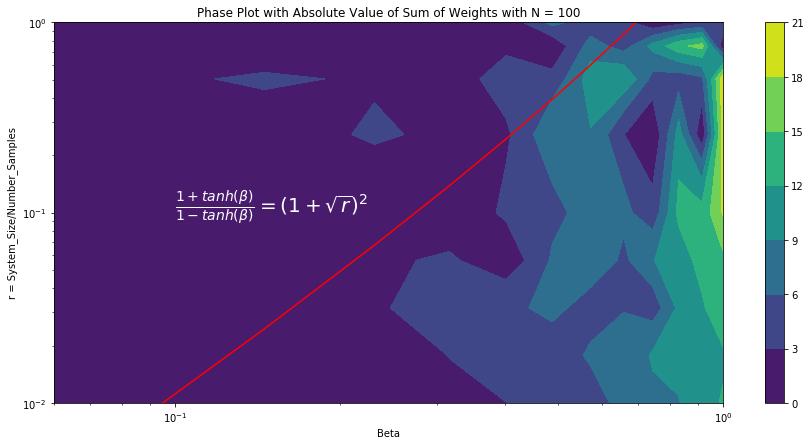

In [240]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
plt.contourf(beta,float(N[0])/Num_configs,abs(sum_weightsRBM2.T))
plt.plot(beta,((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(float(N[0])/Num_configs),max(float(N[0])/Num_configs)])
plt.xlim([min(beta),max(beta)])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('r = System_Size/Number_Samples')
plt.title('Phase Plot with Absolute Value of Sum of Weights with N = 100')
ax.text(0.1,0.1, r'$\frac{1+tanh(\beta)}{1-tanh(\beta)} = (1+\sqrt{r})^2$', fontsize=20,color = 'white')

Text(0.1,0.1,u'$\\frac{1+tanh(\\beta)}{1-tanh(\\beta)} = (1+\\sqrt{r})^2$')

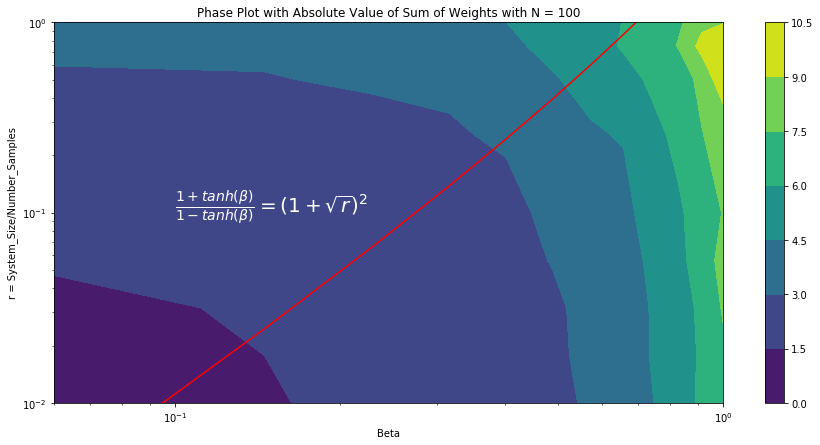

In [237]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
plt.contourf(beta,float(N[0])/Num_configs,abs(mat_topEVal.T))
plt.plot(beta,((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(float(N[0])/Num_configs),max(float(N[0])/Num_configs)])
plt.xlim([min(beta),max(beta)])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('r = System_Size/Number_Samples')
plt.title('Phase Plot with Absolute Value of Sum of Weights with N = 100')
ax.text(0.1,0.1, r'$\frac{1+tanh(\beta)}{1-tanh(\beta)} = (1+\sqrt{r})^2$', fontsize=20,color = 'white')

Text(0.1,0.1,u'$\\frac{1+tanh(\\beta)}{1-tanh(\\beta)} = (1+\\sqrt{r})^2$')

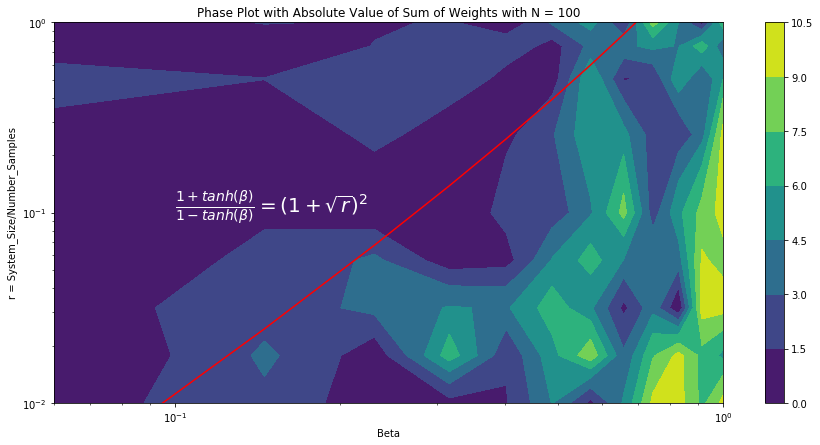

In [248]:
fig = plt.figure(figsize=[15,7])
ax = fig.add_subplot(111)
plt.contourf(beta,float(N[0])/Num_configs,abs((np.sum(mat_topEV,axis=2))/(np.sqrt(np.sum(np.square(mat_topEV),axis=2)))).T)
plt.plot(beta,((((1+np.tanh(beta))/(1-np.tanh(beta)))**0.5 - 1)**2),'red')
plt.xscale('log')
plt.yscale('log')
plt.ylim([min(float(N[0])/Num_configs),max(float(N[0])/Num_configs)])
plt.xlim([min(beta),max(beta)])
plt.colorbar()
plt.xlabel('Beta')
plt.ylabel('r = System_Size/Number_Samples')
plt.title('Phase Plot with Absolute Value of Sum of Weights with N = 100')
ax.text(0.1,0.1, r'$\frac{1+tanh(\beta)}{1-tanh(\beta)} = (1+\sqrt{r})^2$', fontsize=20,color = 'white')